In [1]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

from cancer_estimator_model import datasets

# Carregar o dataset 
df = datasets.get_integrated_dataset()
display(df.head(10).T)
df.info()

,0,1,2,3,4,5,6,7,8,9
AGE,69.0,74.0,59.0,63.0,63.0,75.0,52.0,51.0,68.0,53.0
SMOKING,0,1,0,1,0,0,1,1,1,1
YELLOW_FINGERS,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
ANXIETY,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
PEER_PRESSURE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
CHRONIC_DISEASE,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
FATIGUE,1,1,1,0,0,1,1,1,1,0
ALLERGY,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
WHEEZING,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
ALCOHOL_CONSUMING,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318109 entries, 0 to 318108
Data columns (total 60 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGE                    1309 non-null    float64
 1   SMOKING                318109 non-null  int64  
 2   YELLOW_FINGERS         1309 non-null    float64
 3   ANXIETY                309 non-null     float64
 4   PEER_PRESSURE          309 non-null     float64
 5   CHRONIC_DISEASE        309 non-null     float64
 6   FATIGUE                318109 non-null  int64  
 7   ALLERGY                309 non-null     float64
 8   WHEEZING               1309 non-null    float64
 9   ALCOHOL_CONSUMING      309 non-null     float64
 10  COUGHING               318109 non-null  int64  
 11  SHORTNESS_OF_BREATH    318109 non-null  int64  
 12  SWALLOWING_DIFFICULTY  318109 non-null  int64  
 13  CHEST_PAIN             318109 non-null  int64  
 14  LUNG_CANCER            318109 non-nu

In [3]:
# Dividir o conjunto de dados em features (X) e variável alvo (y)
X = df.drop(columns=['LUNG_CANCER','COUNTRY'])
y = df['LUNG_CANCER']

# Tratar valores ausentes nas colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    X[col].fillna('missing', inplace=True)

# Dividir o conjunto de dados em train and test
X_train = X[X.source != 3]  # dropa os dados que tem a source 3 (dataset covid)
X_test = X[X.source == 3]   # coloca somente os dados com a source 3 no teste (dataset covid)
y_train = y[X.source != 3].astype(float)  # dropa os dados que tem a source 3 (dataset covid) na target
# y_test = y[X.source == 3]   # NÃO HÁ ROTULOS NO DATASET 3


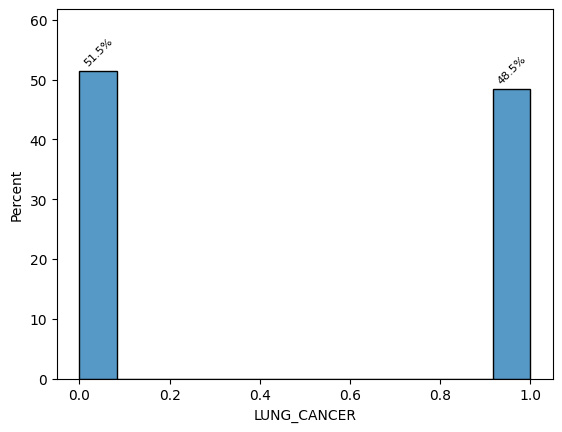

In [4]:
def plot_y_distribution(y):
    # Criando distribuição da variável resposta estimada
    ax = sns.histplot(y, stat='percent')
    
    
    # add annotations
    for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=45, padding=2)
        
        ax.margins(y=0.2)
    plt.show()
plot_y_distribution(y_train)

# Cross validation with catboost regression

0:	learn: 0.4561044	total: 150ms	remaining: 1m 14s
100:	learn: 0.0773702	total: 3.28s	remaining: 13s
200:	learn: 0.0537117	total: 6.85s	remaining: 10.2s
300:	learn: 0.0413975	total: 10.2s	remaining: 6.73s
400:	learn: 0.0317828	total: 13.7s	remaining: 3.39s
499:	learn: 0.0261577	total: 17.1s	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       169
         1.0       0.99      0.95      0.97       159

    accuracy                           0.97       328
   macro avg       0.97      0.97      0.97       328
weighted avg       0.97      0.97      0.97       328



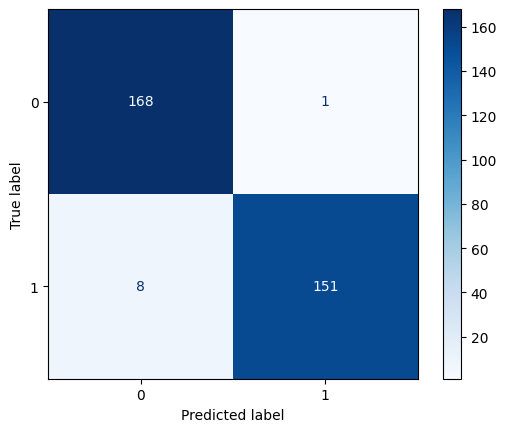

0:	learn: 0.4572328	total: 27.8ms	remaining: 13.9s
100:	learn: 0.0940517	total: 3.34s	remaining: 13.2s
200:	learn: 0.0645739	total: 7.18s	remaining: 10.7s
300:	learn: 0.0487791	total: 10.6s	remaining: 7.02s
400:	learn: 0.0380692	total: 14.1s	remaining: 3.49s
499:	learn: 0.0325107	total: 17.7s	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       168
         1.0       0.99      0.98      0.99       159

    accuracy                           0.99       327
   macro avg       0.99      0.99      0.99       327
weighted avg       0.99      0.99      0.99       327



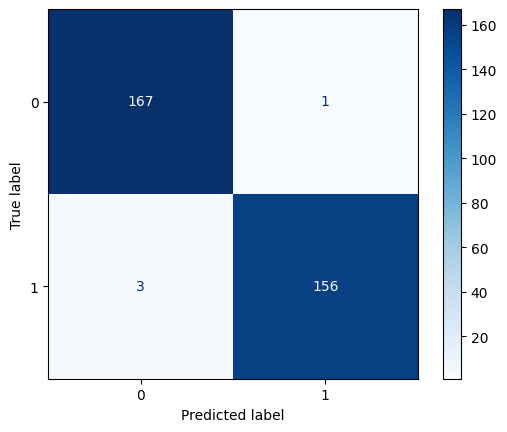

0:	learn: 0.4553808	total: 24.8ms	remaining: 12.4s
100:	learn: 0.0837882	total: 3.32s	remaining: 13.1s
200:	learn: 0.0520671	total: 6.85s	remaining: 10.2s
300:	learn: 0.0302923	total: 10.3s	remaining: 6.84s
400:	learn: 0.0221067	total: 13.7s	remaining: 3.39s
499:	learn: 0.0152601	total: 17.2s	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       168
         1.0       0.96      0.97      0.96       159

    accuracy                           0.96       327
   macro avg       0.96      0.96      0.96       327
weighted avg       0.96      0.96      0.96       327



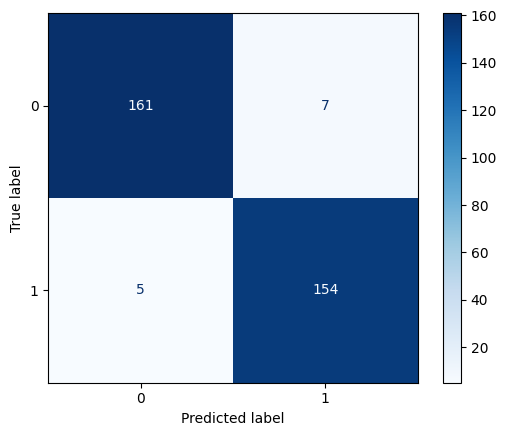

0:	learn: 0.4568439	total: 25.5ms	remaining: 12.7s
100:	learn: 0.0676349	total: 3.43s	remaining: 13.6s
200:	learn: 0.0478427	total: 7.37s	remaining: 11s
300:	learn: 0.0342879	total: 11.4s	remaining: 7.52s
400:	learn: 0.0258623	total: 15s	remaining: 3.69s
499:	learn: 0.0195693	total: 18.4s	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       169
         1.0       0.99      0.96      0.97       158

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



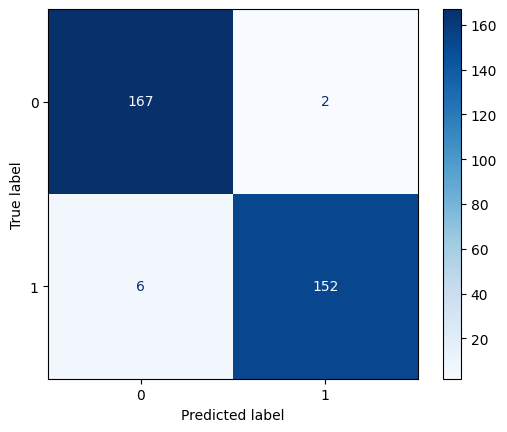

Pontuações de validação cruzada (F1): [0.97106109 0.98734177 0.9625     0.97435897]
Média e desvio padrão das pontuações de validação cruzada: 0.9738±0.0089


In [5]:
# Criar o modelo CatBoostRegressor
model = CatBoostRegressor(
    iterations=500, 
    depth=6,
    eval_metric="RMSE",  # Métrica apropriada para regressão
    learning_rate=0.1, 
    cat_features=categorical_cols,  # Passar as colunas categóricas
    verbose=100
)

# Definir o número de dobras para a validação cruzada
n_folds = 4

# Definir um limiar de decisão para converter previsões contínuas em classes
decision_threshold = 0.7

def custom_scoring(y_true, y_pred):
    y_pred_class = (y_pred >= decision_threshold).astype(int)  # Converter previsões contínuas para classes com base no limiar
    report = classification_report(y_true, y_pred_class)
    cm = confusion_matrix(y_true, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    print(report)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    return f1_score(y_true, y_pred_class)

# Criar o objeto de validação cruzada estratificada
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Realizar a validação cruzada estratificada
scores = cross_val_score(
    model, X_train, y_train, 
    cv=skf, scoring=make_scorer(custom_scoring)
)

rscores = np.round(scores, decimals=4)
mean = np.round(np.mean(scores), decimals=4)
std = np.round(np.std(scores), decimals=4)
# Exibir as pontuações de validação cruzada
print("Pontuações de validação cruzada (F1):", scores)
# Exibir a média das pontuações de validação cruzada
print(f"Média e desvio padrão das pontuações de validação cruzada: {mean}±{std}")

# Evaluating model in COVID dataset (300k+ samples)

0:	learn: 0.4565301	total: 28.6ms	remaining: 14.2s
100:	learn: 0.0904639	total: 3.24s	remaining: 12.8s
200:	learn: 0.0711945	total: 6.66s	remaining: 9.9s
300:	learn: 0.0528973	total: 10.1s	remaining: 6.7s
400:	learn: 0.0419898	total: 14.1s	remaining: 3.48s
499:	learn: 0.0331334	total: 17.9s	remaining: 0us


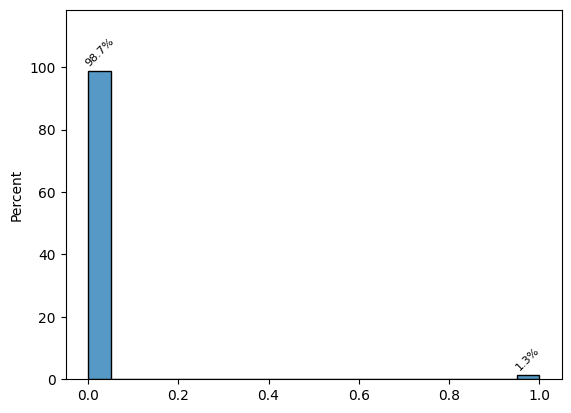

In [6]:
# Ajustar o modelo aos dados de treino completos
model.fit(X_train, y_train)

# Fazer a predição no conjunto de dados de teste
y_pred = model.predict(X_test)
y_pred_class = (y_pred >= decision_threshold).astype(int)  # Converter previsões contínuas para classes

plot_y_distribution(y_pred_class)

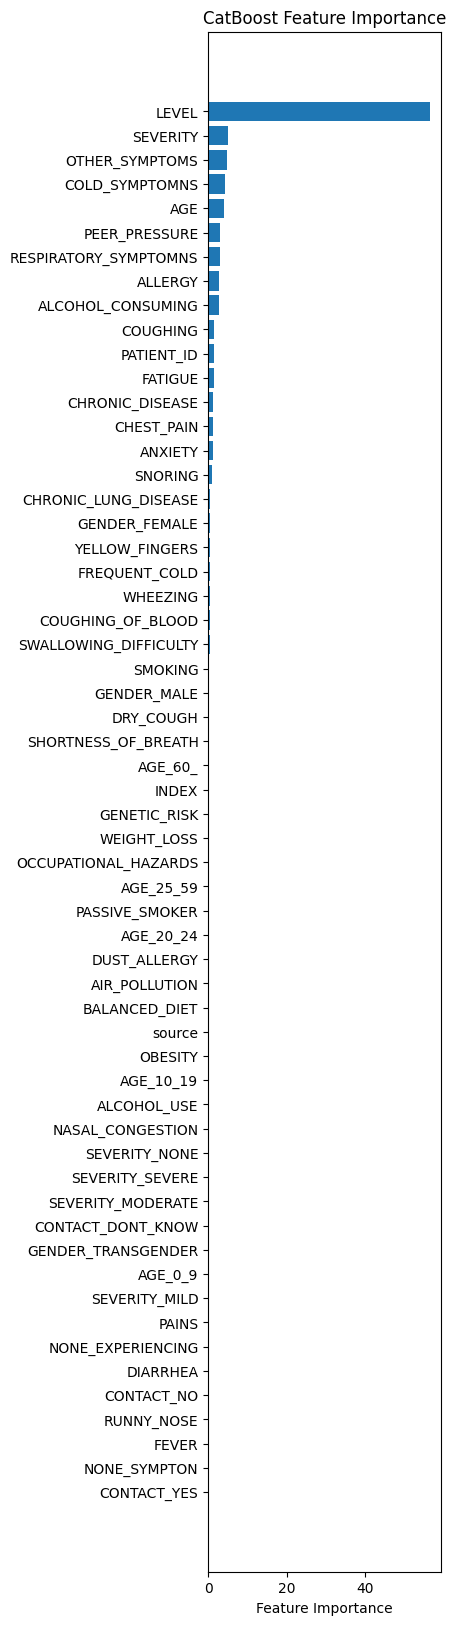

In [7]:
# plot feature importance
feature_importance = model.get_feature_importance(type='FeatureImportance')
feature_names = model.feature_names_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(3,20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()